### Unsupervised learning k-means clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/Users/Ritik/Documents/incomekmean.csv')

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'income')

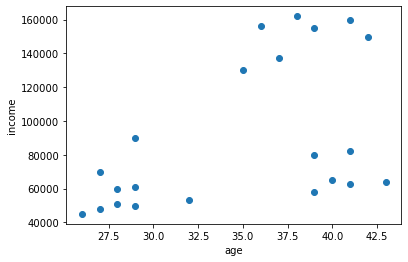

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('age')
plt.ylabel('income')

In [5]:
km =  KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [6]:
df['cluster']=y_predicted

In [7]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [8]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

No handles with labels found to put in legend.


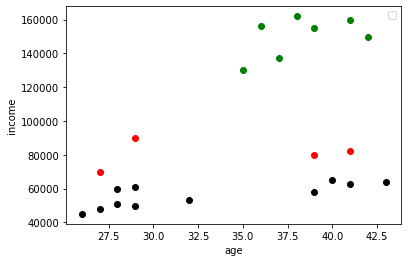

In [10]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

black cluster is not proper that why we need to scale it and black points are different

In [11]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)']= scalar.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,0


income change to 0 to 1 range

In [12]:
scalar = MinMaxScaler()
scalar.fit(df[['Age']])
df['Age']= scalar.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [13]:
km =  KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [14]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [15]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [50]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
import seaborn as sns

No handles with labels found to put in legend.


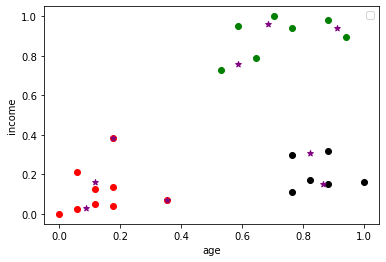

In [51]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

#### how to find the best cluster for different problems in this problem we can clearly see that there is 3 cluseter 

In [18]:
sse = []
k_reg = range(1,10)

for k in k_reg:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age',"Income($)"]])
    sse.append(km.inertia_)
    

In [19]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.22020960864009395,
 0.1685851223602976,
 0.13706529523670866,
 0.10188787724979426]

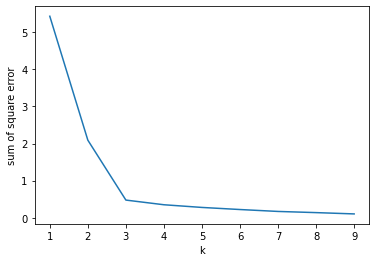

In [20]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_reg,sse)

here we can clearly see that at 3 there is elbow so that means 3 is ideal cluster value

### KNN(K Nearest Neighbors) Classification: Machine learing tutorial for python

In [21]:
import pandas as pd
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
df2 =  pd.DataFrame(iris.data,columns=iris.feature_names)

In [26]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
df2['target'] = iris.target
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df2[df2.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


### apply new column

In [29]:
df2['flower_name']=df2.target.apply(lambda x: iris.target_names[x])

In [30]:
df2[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [31]:
dfa  = df2[:50]
dfb  = df2[50:100]
dfc = df2[100:]

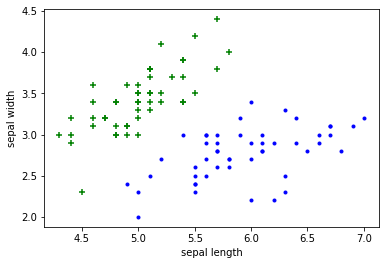

In [32]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(dfa['sepal length (cm)'],dfa['sepal width (cm)'],color='green',marker='+')
plt.scatter(dfb['sepal length (cm)'],dfb['sepal width (cm)'],color='blue',marker='.')

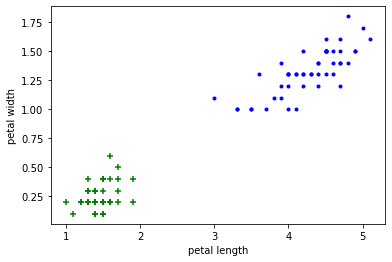

In [33]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(dfa['petal length (cm)'],dfa['petal width (cm)'],color='green',marker='+')
plt.scatter(dfb['petal length (cm)'],dfb['petal width (cm)'],color='blue',marker='.')

In [34]:
from sklearn.model_selection import train_test_split
x  = df2.drop(['target','flower_name'],axis='columns')
y = df2.target

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
len(x_train)

120



### create KNN(k Neighrest Neighbour Classifier)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
knn.score(x_test,y_test)

1.0

In [41]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [42]:
cm

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

Text(42.0, 0.5, 'truth')

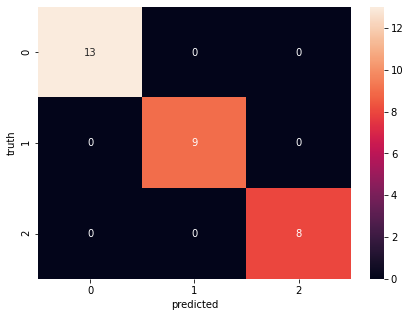

In [43]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Mitchel Starc is a true sportsman he knows his first priority to for his nation and every cricketer should learn from him that earning money is not everything if you a chance to represent country and proud country than your first priorities towards your country only